In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "all-space-missions-from-1957"

In [2]:
space_data <- read_csv("../input/all-space-missions-from-1957/Space_Corrected.csv")
space_data <- space_data[-2] #Getting rid of unnecessary second index column. Side note, R starts indices at 1, which is weird

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  `Unnamed: 0` = col_double(),
  `Company Name` = col_character(),
  Location = col_character(),
  Datum = col_character(),
  Detail = col_character(),
  `Status Rocket` = col_character(),
  Rocket = col_double(),
  `Status Mission` = col_character()
)


Warning message:
“15 parsing failures.
 row    col               expected  actual                                                        file
1917 Rocket no trailing characters 5,000.0 '../input/all-space-missions-from-1957/Space_Corrected.csv'
2001 Rocket no trailing characters 5,000.0 '../input/all-space-missions-from-1957/Space_Corrected.csv'
3150 Rocket no trailing characters 1,160.0 '../input/all-space-missions-from-1957/Space_Corrected.csv'
3181 Rocket no trailing characters 1,160.0 '../input/all-space-missions-from-1957/Space_Corrected.csv'
3244 Rocket no trailin

# Initial exploration of the space data

In [3]:
head(space_data)

X1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NA,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & NJU-HKU 1",StatusActive,64.68,Success


In [4]:
tail(space_data)

X1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NA,Failure
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NA,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NA,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NA,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NA,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NA,Success


# Some basic cleaning of missing space data

In [5]:
missing <- space_data[!complete.cases(space_data),]
dim(missing) #Uh oh, it looks like 3375/4323 rows have missing rocket cost data
head(missing)

[1] 3375    8

X1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NA,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NA,Success
13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NA,Success
28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NA,Success
31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NA,Success
32,CASC,"LC-101, Wenchang Satellite Launch Center, China","Tue May 05, 2020 10:00 UTC",Long March 5B | Test Flight (New Crew Capsule),StatusActive,NA,Success


In [6]:
space_data$Rocket[is.na(space_data$Rocket)]<-median(space_data$Rocket,na.rm=TRUE)
head(space_data) #Since this is a first experience with R, I just did a simple imutation of missing cost values with the median rocket cost

X1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & NJU-HKU 1",StatusActive,64.68,Success


# Summarizing some space data

In [7]:
#In order to better summarize the data, I decided to isolate years from the data column so that I have more numerical data
years <- rep(NA, nrow(space_data))
for (i in 1:nrow(space_data)) {
    years[i] <- as.numeric(str_split(space_data[i, 'Datum'], " ")[[1]][4])
}
space_data["Year"] <- years
head(space_data)

X1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & NJU-HKU 1",StatusActive,64.68,Success,2020


In [8]:
summary(space_data)

       X1       Company Name         Location            Datum          
 Min.   :   0   Length:4324        Length:4324        Length:4324       
 1st Qu.:1081   Class :character   Class :character   Class :character  
 Median :2162   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2162                                                           
 3rd Qu.:3242                                                           
 Max.   :4323                                                           
    Detail          Status Rocket          Rocket       Status Mission    
 Length:4324        Length:4324        Min.   :  5.30   Length:4324       
 Class :character   Class :character   1st Qu.: 62.00   Class :character  
 Mode  :character   Mode  :character   Median : 62.00   Mode  :character  
                                       Mean   : 76.88                     
                                       3rd Qu.: 62.00                     
                                       

In [9]:
head(space_data %>%
    group_by(Year) %>%
    summarise(averageCost = mean(Rocket),
             sdCost = sd(Rocket)))

Year,averageCost,sdCost
<dbl>,<dbl>,<dbl>
1957,62,0
1958,62,0
1959,62,0
1960,62,0
1961,62,0
1962,62,0


# Graphing some space data

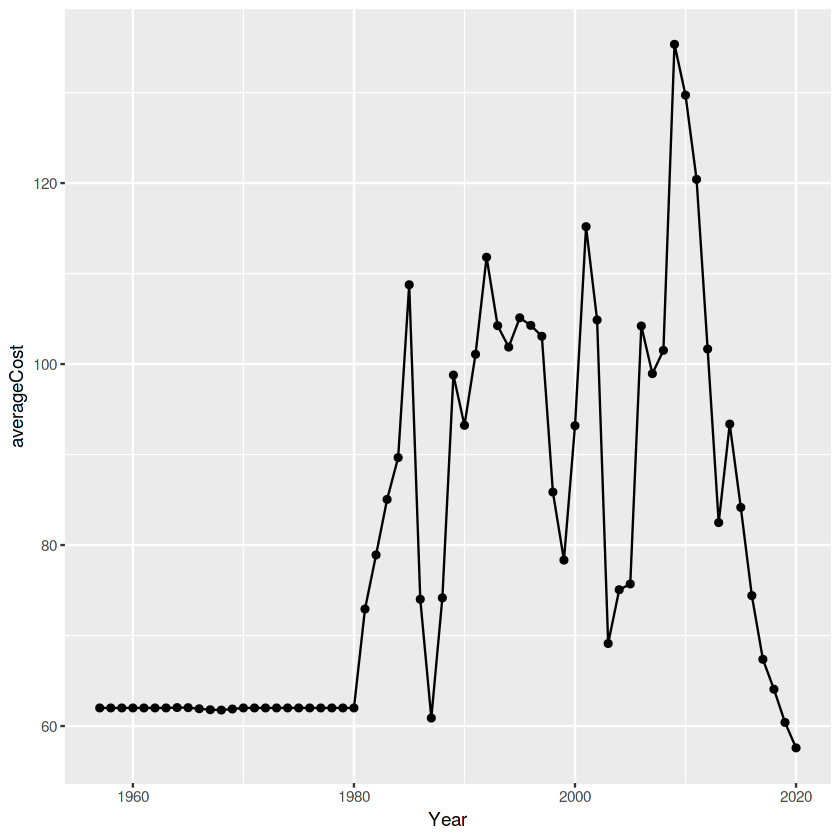

In [10]:
#Graphing a basic year vs. rocket cost graph
costByYear <- space_data %>%
    group_by(Year) %>%
    summarise(averageCost = mean(Rocket),
             sdCost = sd(Rocket))

ggplot(costByYear, aes(y= averageCost, x = Year)) + 
    geom_point() + # plot individual points
    geom_line() # plot line

#Everything before 1980 is a constant price because there was no rocket cost data in the dataset, so they were all set to the median cost: $62 (in millions)